# q3

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


In [ ]:

def create_dataset(n_points=1000):
    # Define the polygon using the given boundary points
    boundary_points = [(2, 2), (2, 6), (4, 6), (6, 8), (6, 2)]
    polygon = Polygon(boundary_points)

    # Generate random points
    x_min, x_max = 0, 8
    y_min, y_max = 0, 10
    X = np.random.uniform(low=[x_min, y_min], high=[x_max, y_max], size=(n_points, 2))

    # Label points (1 if inside polygon, 0 if outside)
    y = np.array([1 if polygon.contains(Point(x, y)) else 0 for x, y in X])

    return X, y


In [ ]:
class MLPNetwork:
    def __init__(self):
        # Initialize weights and biases
        self.W1 = np.random.randn(2, 5) * 0.01  # Input (2) to first hidden layer (5)
        self.b1 = np.zeros((5,))
        self.W2 = np.random.randn(5, 2) * 0.01  # First hidden (5) to second hidden layer (2)
        self.b2 = np.zeros((2,))
        self.W3 = np.random.randn(2, 1) * 0.01  # Second hidden (2) to output layer (1)
        self.b3 = np.zeros((1,))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)

        return self.a3

    def backward(self, X, y, learning_rate=0.1):
        m = X.shape[0]

        # Output layer
        dz3 = self.a3 - y.reshape(-1, 1)
        dW3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0) / m

        # Second hidden layer
        dz2 = np.dot(dz3, self.W3.T) * self.sigmoid_derivative(self.a2)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0) / m

        # First hidden layer
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0) / m

        # Update parameters
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        losses = []
        for epoch in range(epochs):
            # Forward propagation
            y_pred = self.forward(X)

            # Calculate loss
            loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
            losses.append(loss)

            # Backward propagation
            self.backward(X, y, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return losses

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

    # Define the vertices of the polygon
    vertices = [(2, 2), (2, 6), (4, 6), (6, 8), (6, 2)]
    polygon = np.array(vertices + [vertices[0]])  # Close the polygon by adding the first point at the end

    # Plot the polygon
    plt.plot(polygon[:, 0], polygon[:, 1], color='red', linestyle='-', linewidth=2, label='Polygon')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary with Polygon')
    plt.legend()
    plt.show()


In [ ]:

# Generate dataset
X, y = create_dataset(1000)


In [ ]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Create and train the model
model = MLPNetwork()
losses = model.train(X_train, y_train, epochs=1000, learning_rate=0.1)


Epoch 0, Loss: 0.6954
Epoch 100, Loss: 0.5584
Epoch 200, Loss: 0.5582
Epoch 300, Loss: 0.5582
Epoch 400, Loss: 0.5582
Epoch 500, Loss: 0.5582
Epoch 600, Loss: 0.5582
Epoch 700, Loss: 0.5582
Epoch 800, Loss: 0.5582
Epoch 900, Loss: 0.5582


In [ ]:

# Plot training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:


# Plot decision boundary
plot_decision_boundary(model, X, y)


In [ ]:

# Evaluate the model
y_pred = model.forward(X_test)
accuracy = np.mean((y_pred >= 0.5).flatten() == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7400


# q4

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
!gdown 1UzwkQLtuZS67y1UgDbo0hRx2quTBU-nD

Downloading...
From: https://drive.google.com/uc?id=1UzwkQLtuZS67y1UgDbo0hRx2quTBU-nD
To: /content/Admission_Predict.csv
100% 12.9k/12.9k [00:00<00:00, 41.4MB/s]


In [ ]:
data = pd.read_csv('Admission_Predict.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df = pd.DataFrame(data)
nan_counts = df.isna().sum()

print(nan_counts)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
df.shape

(400, 9)

In [ ]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

# Statistical Analysis of Data

In [ ]:
df.corr(numeric_only=True)

Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.657981  0.567721  0.828417  0.489858          0.791594  
University Rating  0.734523  0.660123  0.746479  0.447783          0.711250  
SOP                1.000000  0.729593  0.718144  0.444029          0.675732  
LOR                0.729593  1.000000  0.670211  0.396859          0.669889  
CGPA               0.718144  0.670211  1.000000  0.521654          0.873289  
Research           0.444029  0.396859  0.521654  1.000000          0.553202  
Chance of Admit    0.675732  0.669889  0.873289  0.553202          1.000000

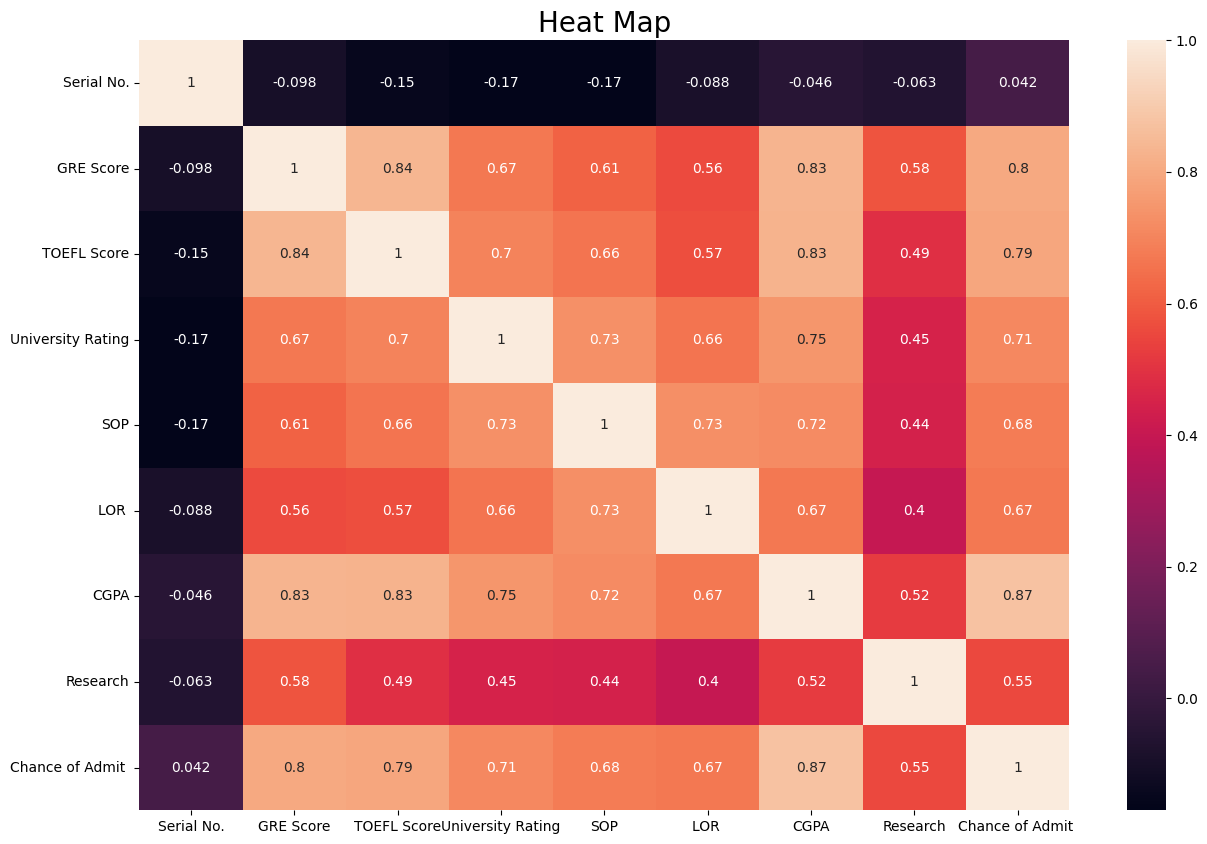

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

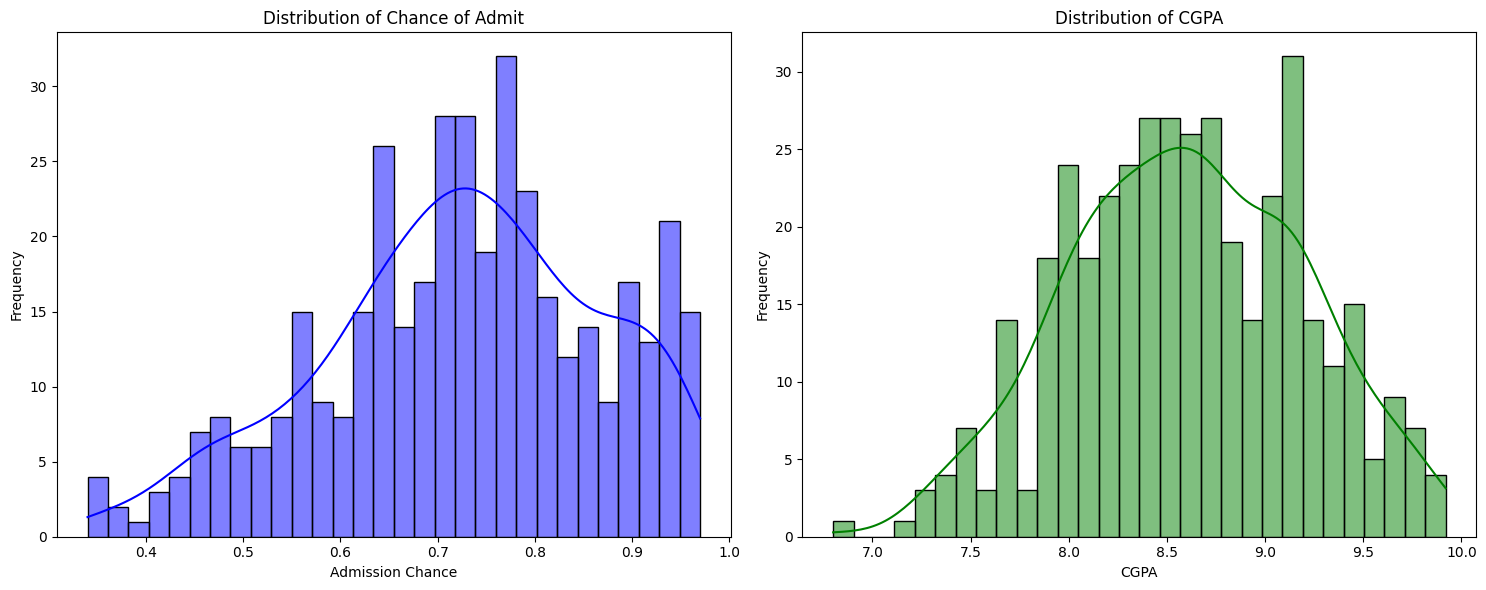

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(data['Chance of Admit '], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Chance of Admit')
axes[0].set_xlabel('Admission Chance')
axes[0].set_ylabel('Frequency')

sns.histplot(data['CGPA'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of CGPA')
axes[1].set_xlabel('CGPA')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Data Improvement

## Data Check & Split

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.15, random_state=33)

y_train = train_data['Chance of Admit ']
y_test = test_data['Chance of Admit ']

X_train = train_data.drop('Chance of Admit ', axis=1)
X_test = test_data.drop('Chance of Admit ', axis=1)

scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

print("Scaled 'Chance of Admit ' values in the training set:")
print(y_train_scaled[:5])  # Displaying the first 5 values for illustration

print("\nScaled 'Chance of Admit ' values in the testing set:")
print(y_test_scaled[:5])  # Displaying the first 5 values for illustration


Scaled 'Chance of Admit ' values in the training set:
[0.87301587 0.55555556 0.84126984 0.44444444 0.80952381]

Scaled 'Chance of Admit ' values in the testing set:
[0.3968254  0.6031746  0.06349206 0.47619048 0.95238095]


# First Training
in this process Adam is used as Optimizer and MSE as Loss function

In [ ]:
float_columns = data.select_dtypes(include='float64').columns

data_float_only = data[float_columns]

# Split the dataset into training, validation, and testing sets (76.5-8.5-15 split)
validation_data, train_data = train_test_split(test_data, test_size=0.1, random_state=33)

# Extract 'Chance of Admit ' from training, validation, and testing sets
y_train = train_data['Chance of Admit ']
y_validation = validation_data['Chance of Admit ']
y_test = test_data['Chance of Admit ']

# Remove 'Chance of Admit ' from training, validation, and testing sets
X_train = train_data.drop('Chance of Admit ', axis=1)
X_validation = validation_data.drop('Chance of Admit ', axis=1)
X_test = test_data.drop('Chance of Admit ', axis=1)

# Apply MinMaxScaler to features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_validation_scaled = scaler_X.transform(X_validation)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_validation_scaled = scaler_y.transform(y_validation.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Create the MLP model with two hidden layers and use the Adam optimizer
mlp_model = MLPRegressor(
    hidden_layer_sizes=(30),
    max_iter=1000,
    random_state=33,
    solver='adam')

# Train the model
mlp_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the validation set
y_validation_pred_scaled = mlp_model.predict(X_validation_scaled)

# Inverse transform the scaled predictions to get the original scale
y_validation_pred = scaler_y.inverse_transform(y_validation_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the model using Mean Squared Error and R^2 score on the validation set
mse_validation = mean_squared_error(y_validation, y_validation_pred)
r2_validation = r2_score(y_validation, y_validation_pred)

print(f'Mean Squared Error on Validation Set: {mse_validation}')
print(f'R^2 Score on Validation Set: {r2_validation}')


Mean Squared Error on Validation Set: 0.015137055837940897
R^2 Score on Validation Set: 0.29980290228040685


## Plotting Loss & R2

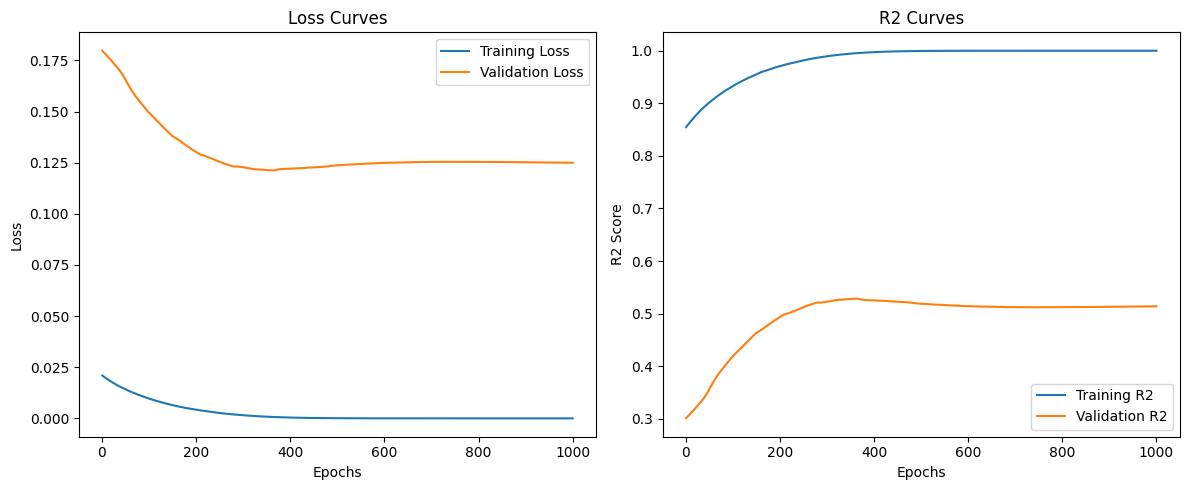

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Initialize lists to store loss and R2 values
train_losses = []
validation_losses = []
train_r2 = []
validation_r2 = []

# Number of epochs
n_epochs = 1000

# Train the model using partial_fit and capture the metrics
for epoch in range(n_epochs):
    mlp_model.partial_fit(X_train_scaled, y_train_scaled)

    # Predictions
    y_train_pred_scaled = mlp_model.predict(X_train_scaled)
    y_validation_pred_scaled = mlp_model.predict(X_validation_scaled)

    # Calculate MSE and R2 for training and validation
    train_loss = mean_squared_error(y_train_scaled, y_train_pred_scaled)
    validation_loss = mean_squared_error(y_validation_scaled, y_validation_pred_scaled)

    train_r2_value = r2_score(y_train_scaled, y_train_pred_scaled)
    validation_r2_value = r2_score(y_validation_scaled, y_validation_pred_scaled)

    # Append values to lists
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)
    train_r2.append(train_r2_value)
    validation_r2.append(validation_r2_value)

# Plotting
epochs = range(1, n_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, validation_losses, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot R2
plt.subplot(1, 2, 2)
plt.plot(epochs, train_r2, label='Training R2')
plt.plot(epochs, validation_r2, label='Validation R2')
plt.title('R2 Curves')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


# Second Training
in this process SGD is used as Optimizer and Huber as Loss function

In [ ]:
float_columns = data.select_dtypes(include='float64').columns

data_float_only = data[float_columns]

# Split the dataset into training, validation, and testing sets (76.5-8.5-15 split)
validation_data, train_data = train_test_split(test_data, test_size=0.1, random_state=33)

# Extract 'Chance of Admit ' from training, validation, and testing sets
y_train = train_data['Chance of Admit ']
y_validation = validation_data['Chance of Admit ']
y_test = test_data['Chance of Admit ']

# Remove 'Chance of Admit ' from training, validation, and testing sets
X_train = train_data.drop('Chance of Admit ', axis=1)
X_validation = validation_data.drop('Chance of Admit ', axis=1)
X_test = test_data.drop('Chance of Admit ', axis=1)

# Apply MinMaxScaler to features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_validation_scaled = scaler_X.transform(X_validation)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_validation_scaled = scaler_y.transform(y_validation.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Create the MLP model with two hidden layers and use the Adam optimizer
mlp_model = MLPRegressor(
    hidden_layer_sizes=(70,40,10),
    max_iter=1000,
    random_state=33,
    solver='adam')

# Train the model
mlp_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the validation set
y_validation_pred_scaled = mlp_model.predict(X_validation_scaled)

# Inverse transform the scaled predictions to get the original scale
y_validation_pred = scaler_y.inverse_transform(y_validation_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the model using Mean Squared Error and R^2 score on the validation set
mse_validation = mean_squared_error(y_validation, y_validation_pred)
r2_validation = r2_score(y_validation, y_validation_pred)

print(f'Mean Squared Error on Validation Set: {mse_validation}')
print(f'R^2 Score on Validation Set: {r2_validation}')

Mean Squared Error on Validation Set: 0.011720259896090756
R^2 Score on Validation Set: 0.45785415264224716


## Plotting Loss & R2

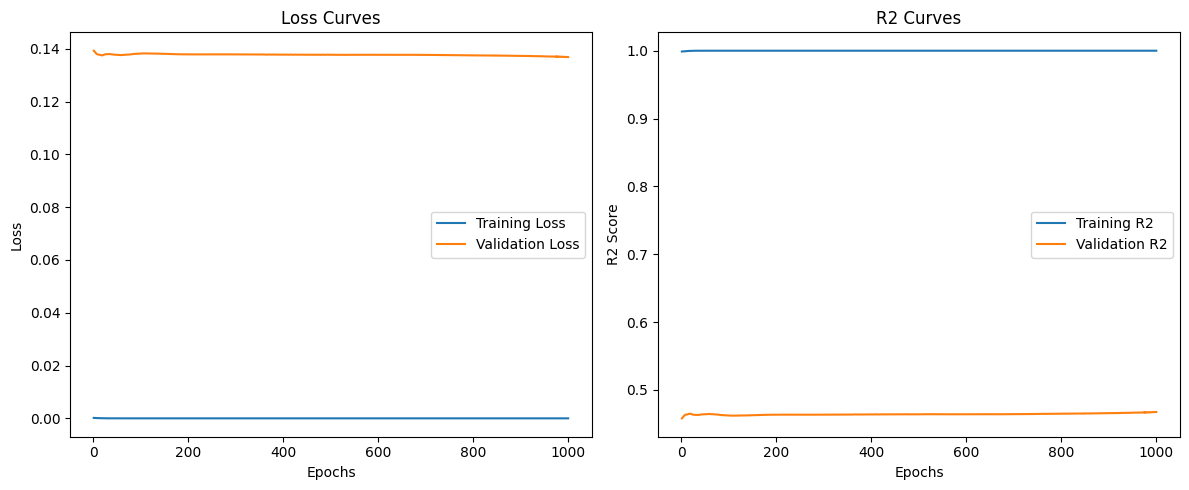

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Initialize lists to store loss and R2 values
train_losses = []
validation_losses = []
train_r2 = []
validation_r2 = []

# Number of epochs
n_epochs = 1000

# Train the model using partial_fit and capture the metrics
for epoch in range(n_epochs):
    mlp_model.partial_fit(X_train_scaled, y_train_scaled)

    # Predictions
    y_train_pred_scaled = mlp_model.predict(X_train_scaled)
    y_validation_pred_scaled = mlp_model.predict(X_validation_scaled)

    # Calculate MSE and R2 for training and validation
    train_loss = mean_squared_error(y_train_scaled, y_train_pred_scaled)
    validation_loss = mean_squared_error(y_validation_scaled, y_validation_pred_scaled)

    train_r2_value = r2_score(y_train_scaled, y_train_pred_scaled)
    validation_r2_value = r2_score(y_validation_scaled, y_validation_pred_scaled)

    # Append values to lists
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)
    train_r2.append(train_r2_value)
    validation_r2.append(validation_r2_value)

# Plotting
epochs = range(1, n_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, validation_losses, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot R2
plt.subplot(1, 2, 2)
plt.plot(epochs, train_r2, label='Training R2')
plt.plot(epochs, validation_r2, label='Validation R2')
plt.title('R2 Curves')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()


# Prediction

In [ ]:
# Assuming 'X_test_scaled', 'y_test' are defined
# Assuming 'mlp_model' is your trained MLP model

# Select 5 random indices from the validation set
random_indices = random.sample(range(len(X_test_scaled)), 5)

# Extract the features and target values for the selected random indices
X_random = X_test_scaled[random_indices]
y_random_true = y_test.iloc[random_indices]

# Make predictions on the selected data points
y_random_pred_scaled = mlp_model.predict(X_random)
y_random_pred = scaler_y.inverse_transform(y_random_pred_scaled.reshape(-1, 1)).flatten()

# Display the real price and predicted price for the selected data points
for i in range(5):
    print(f"Data Point {i + 1}:")
    print(f"Real Admission Chance: {y_random_true.iloc[i]}")
    print(f"Predicted Chance: {y_random_pred[i]}\n")

Data Point 1:
Real Admission Chance: 0.73
Predicted Chance: 0.7390653728698249

Data Point 2:
Real Admission Chance: 0.52
Predicted Chance: 0.680275672227641

Data Point 3:
Real Admission Chance: 0.57
Predicted Chance: 0.6226679274138348

Data Point 4:
Real Admission Chance: 0.77
Predicted Chance: 0.7698894497481459

Data Point 5:
Real Admission Chance: 0.95
Predicted Chance: 0.943751649737622

